<a href="https://colab.research.google.com/github/Dare-Badejo-001/Industrial-Stats-Design-of-experiments/blob/main/Ch3_ClassicalDesign_and_AnalysisOfExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
- Experiemnrs are used in the industry to inprove productivity, reduce variance, enhance quality and obtain robust products and manufacturing processes

- Here we study and analyze experiments which are aimed at testing scientific or technological hypothesis.

- These hypothesis are concerned with the effects of procedures or treatment quality and productivity; or the general relationship between variables

- Designed experiments help determine the conditions uncer which a production process yields maximum output or other optimum results.

## The Basic steps for statistical DOE includes
- Define the objectives and criteria to test wether these objectives are met
- Define your response variables
- Define the factors that affects the response variables ( they are called controllable factors )
- Determine the typr of measurements or observations on all variables
- Determine the level of measurements of the controllable factors
- Hypothesize a statistical model between the pertinent variables and their error distributions
- Experimental layout shouldb e designed so that the inference from the gathered data will be :
  - Valid
  - Precise
  - Generalizable
  - repeatable  
- Trails of should be performed in randome order to avoid bias
- resulst should be carefully analyzed
- Confirmatory experiments shoould be conducted

In [10]:
# Install necessary packages
!pip install outdated mistat pingouin pwlf

# Set up the environment and suppress warnings
import os
os.environ['OUTDATED_IGNORE'] = '1'

import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Import necessary libraries
import matplotlib.pyplot as plt
import mistat
import pingouin as pg
from collections import defaultdict
import mistat
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats import anova
from scipy import stats
import random



#### The $t$-Test

#### Randomization Tests

In [5]:
random.seed(1)
X = [1.1, 0.3, -0.7, -0.1]
m = 20000

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

np.mean(DiX.mean(axis=1) > np.mean(X))

0.31425

In [6]:
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
statistic, pvalue = stats.ttest_1samp(X, 0.0)
print(f't {statistic:.2f}')
print(f'pvalue {pvalue:.4f}')

t 3.35
pvalue 0.0085


In [8]:
random.seed(112334)
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
m = 200

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

means = DiX.mean(axis=1)
mistat.stemLeafDiagram(means, 2, leafUnit=0.01)

       1     -4   1
       5     -3   9977
       9     -3   5221
      19     -3   0099977755
      26     -2   4433211
      39     -2   0999999997666
      58     -1   5555444433333332211
      79      0   999999999998887775555
    (46)      0   5554444444433333222222111100122223333333333344
      75      0   5566666666777788999999
      53      1   000111133333334555
      35      1   55566779
      27      2   001112233333
      15      2   5556677889
       5      3   025
       2      3   77


In [9]:
random.seed(1)
X = [0.8, 0.6, 0.3, -0.1, 1.1, -0.2, 0.3, 0.5, 0.5, 0.3]
m = 200

Di = pd.DataFrame([random.choices((-1, 1), k=len(X)) for _ in range(m)])
DiX = (Di * X)

means = DiX.mean(axis=1)
Pestimate = np.mean(DiX.mean(axis=1) > np.mean(X))
print(f'P_estimate: {Pestimate}')

P_estimate: 0.01


### Several Blocks, $t$ Treatments per Block

In [11]:
hadpas = mistat.load_data('HADPAS')

model = smf.ols('res3 ~ C(diska) + C(hyb)', data=hadpas).fit()
print(anova.anova_lm(model))

             df        sum_sq        mean_sq           F        PR(>F)
C(diska)   31.0  2.804823e+06   90478.160618   26.863283  1.169678e-47
C(hyb)      5.0  1.780741e+06  356148.170833  105.741638  4.017015e-48
Residual  155.0  5.220551e+05    3368.097715         NaN           NaN


In [13]:
model.conf_int().tail(5)

,0,1
C(hyb)[T.2],-269.254303,-211.933197
C(hyb)[T.3],-321.723053,-264.401947
C(hyb)[T.4],-271.660553,-214.339447
C(hyb)[T.5],-191.504303,-134.183197
C(hyb)[T.6],-158.160553,-100.839447


In [14]:
ci = model.conf_int().tail(5)
hyb_mean = hadpas.groupby(by='hyb').mean()['res3'] - hadpas['res3'].mean()
print(hyb_mean.round(2))
(ci.iloc[:,1] - ci.iloc[:,0]) / 2

hyb
1    178.17
2    -62.43
3   -114.90
4    -64.83
5     15.32
6     48.67
Name: res3, dtype: float64


C(hyb)[T.2]    28.660553
C(hyb)[T.3]    28.660553
C(hyb)[T.4]    28.660553
C(hyb)[T.5]    28.660553
C(hyb)[T.6]    28.660553
dtype: float64

## Balanced Incomplete Block Designs

## Latin Square Design

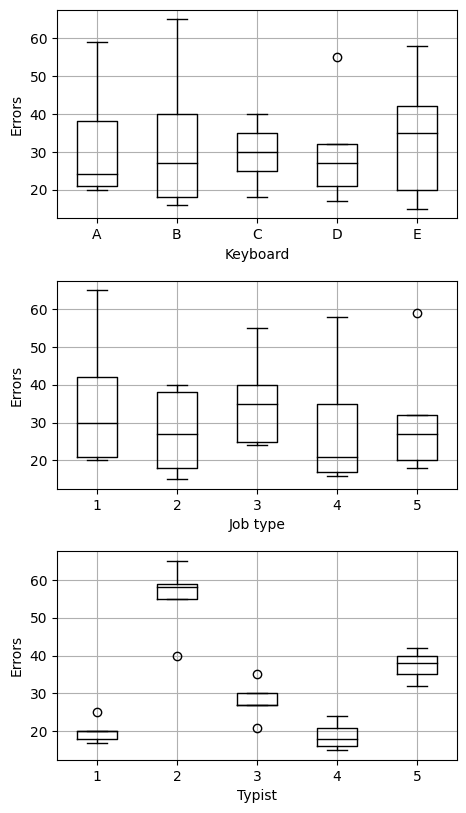

In [15]:
fig, axes = plt.subplots(nrows=3, figsize=(5, 10))
keyboards = mistat.load_data('KEYBOARDS.csv')
effects = [('keyboard', 'Keyboard'), ('job', 'Job type'), ('typist', 'Typist')]

for ax, (effect, label) in zip(axes, effects):
  keyboards.boxplot(column='errors', by=effect, color='black', ax=ax)
  ax.set_title('')
  ax.get_figure().suptitle('')
  ax.set_xlabel(label)
  ax.set_ylabel('Errors')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [16]:
keyboards = mistat.load_data('KEYBOARDS.csv')
model = smf.ols('errors ~ C(keyboard) + C(job) + C(typist)', data=keyboards).fit()
print(anova.anova_lm(model))

               df   sum_sq      mean_sq          F        PR(>F)
C(keyboard)   4.0    69.44    17.360000   0.774078  5.627148e-01
C(job)        4.0   270.64    67.660000   3.016944  6.158117e-02
C(typist)     4.0  4554.64  1138.660000  50.772592  2.009919e-07
Residual     12.0   269.12    22.426667        NaN           NaN


## Full Factorial Experiments

### The Structure of Factorial Experiments

### The ANOVA for Full Factorial Designs

In [18]:
from mistat.design import doe
np.random.seed(2)

# Build design from factors,. The factors here are k and s
FacDesign = doe.full_fact({
    'k': [1500, 3000, 4500],
    's': [0.005, 0.0125, 0.02],
})

# Randomize design
FacDesign = FacDesign.sample(frac=1).reset_index(drop=True)


# Setup and run simulator with five replicates
# for each combination of factors: Note that v0 , p0 ,
# t and t0 are constant in the table
# the response variable is seconds


simulator = mistat.PistonSimulator(n_replicate=5, **FacDesign,
                                   m=30, v0=0.005, p0=95_000, t=293, t0=350)

result = simulator.simulate()


In [20]:
result

,m,s,v0,k,p0,t,t0,seconds,group
0,30,0.0125,0.005,3000,95000,293,350,0.032822,1
1,30,0.0125,0.005,3000,95000,293,350,0.034500,1
2,30,0.0125,0.005,3000,95000,293,350,0.033841,1
3,30,0.0125,0.005,3000,95000,293,350,0.030876,1
4,30,0.0125,0.005,3000,95000,293,350,0.050049,1
5,30,0.0050,0.005,3000,95000,293,350,0.171260,2
6,30,0.0050,0.005,3000,95000,293,350,0.079113,2
7,30,0.0050,0.005,3000,95000,293,350,0.102159,2
8,30,0.0050,0.005,3000,95000,293,350,0.246289,2
9,30,0.0050,0.005,3000,95000,293,350,0.131928,2


In [26]:
# buld a least square with the data and perform
model = smf.ols('seconds ~ C(k) * C(s)', data=result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     14.93
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.33e-09
Time:                        20:23:24   Log-Likelihood:                 98.616
No. Observations:                  45   AIC:                            -179.2
Df Residuals:                      36   BIC:                            -163.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0914      0.014      6.758      0.000       0.064       0.119
C(k)[T.3000]                    0.0548      0.019      2.865      0.007       0.016       0.094
C(k)[T.4500]                    0.0511      0.019      2.673      0.011       0.012       0.090
C(s)[T.0.0125]                 -0.0586      0.019     -3.065      0.004      -0.097      -0.020
C(s)[T.0.02]                   -0.0720      0.019     -3.765      0.001      -0.111      -0.033
C(k)[T.3000]:C(s)[T.0.0125]    -0.0511      0.027     -1.891      0.067      -0.106       0.004
C(k)[T.4500]:C(s)[T.0.0125]    -0.0468      0.027     -1.731      0.092      -0.102       0.008
C(k)[T.3000]:C(s)[T.0.02]      -0.0530      0.027     -1.960      0.058      -0.108       0.002
C(k)[T.4500]:C(s)[T.0.02]      -0.0510      0.027     -1.887      0.067      -0.106       0.004
==============================================================================
Omnibus:                       16.080   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.466
Skew:                           0.720   Prob(JB):                     6.01e-10
Kurtosis:                       7.536   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(anova.anova_lm(model).round(4))

             df  sum_sq  mean_sq        F  PR(>F)
C(k)        2.0  0.0037   0.0019   2.0451  0.1441
C(s)        2.0  0.0997   0.0499  54.5429  0.0000
C(k):C(s)   4.0  0.0057   0.0014   1.5600  0.2060
Residual   36.0  0.0329   0.0009      NaN     NaN


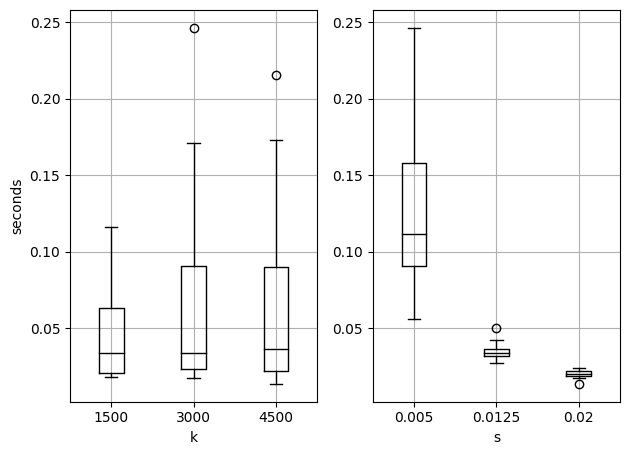

In [32]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(ncols=2)
result.boxplot('seconds', by='k', color='black', ax=axes[0])
result.boxplot('seconds', by='s', color='black', ax=axes[1])
for ax in axes:
    ax.set_title('')
    ax.get_figure().suptitle('')
axes[0].set_ylabel('seconds')

# without using the formatter, the tick labels for s are
# printed without rounding - try it
svalues = [0.005, 0.0125, 0.020]
axes[1].xaxis.set_major_formatter(lambda x, _: svalues[x-1])
plt.tight_layout()
plt.show()

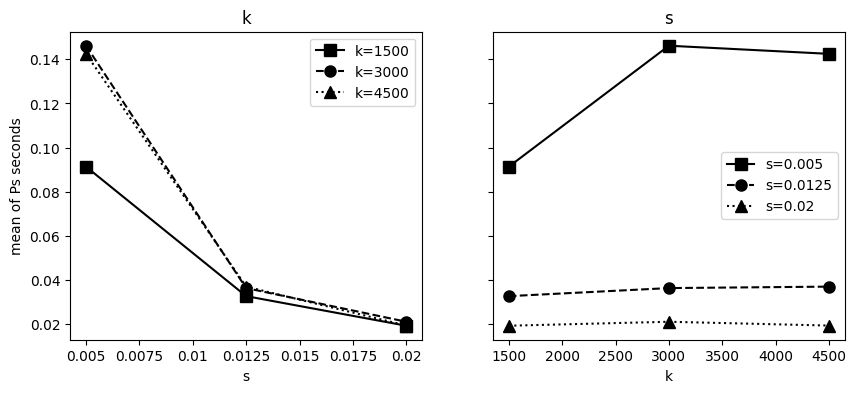

In [34]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(figsize=(10,4), ncols=2, sharey=True)
axes[0].set_title('k')
axes[1].set_title('s')

linestyle = ['-', '--', ':']
marker = ['s', 'o', '^']
grouped = result.groupby(by=['s', 'k'], as_index=False).mean()
for i, (k, g) in enumerate(grouped.groupby('k')):
    g.plot(x='s', y='seconds', ax=axes[0], label=f'k={k:.0f}',
           color='black', marker=marker[i], markersize=8, linestyle=linestyle[i])
axes[0].set_ylabel('mean of Ps seconds')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.4g'))

grouped = result.groupby(by=['k', 's'], as_index=False).mean()
for i, (s, g) in enumerate(grouped.groupby('s')):
    g.plot(x='k', y='seconds', ax=axes[1], label=f's={s:.4g}',
           color='black', marker=marker[i], markersize=8, linestyle=linestyle[i])
ax.set_ylabel('mean of Ps seconds')

plt.show()

In [35]:
anova_result = anova.anova_lm(model)
not_signif = ['C(k)', 'C(k):C(s)', 'Residual']
SS = anova_result['sum_sq'].loc[not_signif].sum()
DF = anova_result['df'].loc[not_signif].sum()
sigma2 = SS / DF
print(SS, DF, sigma2)

0.042345909157371985 42.0 0.0010082359323183806


In [36]:
Ymean = result.groupby('s').mean()['seconds']
print('Ymean', Ymean)
print('Grand', Ymean.sum() / 3)
print('Main effects', Ymean - Ymean.sum() / 3)

Ymean s
0.0050    0.126664
0.0125    0.035420
0.0200    0.019997
Name: seconds, dtype: float64
Grand 0.060693739637674736
Main effects s
0.0050    0.065970
0.0125   -0.025274
0.0200   -0.040696
Name: seconds, dtype: float64


In [37]:
Grand = Ymean.sum() / 3
MainEffects = Ymean - Grand
SEtau = np.sqrt(sigma2 / 30)

In [38]:
Salpha = np.sqrt(2 * stats.f.ppf(0.95, 2, 42))

In [39]:
tau = Ymean - Ymean.sum() / 3
df = pd.DataFrame({
  'tau': tau,
  'lower limit': tau - SEtau*Salpha,
  'upper limit': tau + SEtau*Salpha,
})
df.round(4)

,tau,lower limit,upper limit
s,,,
0.0050,0.0660,0.0513,0.0807
0.0125,-0.0253,-0.0400,-0.0106
0.0200,-0.0407,-0.0554,-0.0260


### Estimating Main Effects and Interactions

### $2^m$ Factorial Designs

In [40]:
d1 = {
    'A': [-1, 1],
    'B': [-1, 1],
    'C': [-1, 1],
    'D': [-1, 1],
    'E': [-1, 1],
}
mistat.addTreatments(doe.frac_fact_res(d1, 4), mainEffects=['A', 'B', 'C', 'D', 'E'])

,Treatments,A,B,C,D,E
0,(1),-1,-1,-1,-1,-1
1,AE,1,-1,-1,-1,1
2,BE,-1,1,-1,-1,1
3,AB,1,1,-1,-1,-1
4,CE,-1,-1,1,-1,1
5,AC,1,-1,1,-1,-1
6,BC,-1,1,1,-1,-1
7,ABCE,1,1,1,-1,1
8,D,-1,-1,-1,1,-1
9,ADE,1,-1,-1,1,1


In [41]:
d1 = {
    'A': [1, 2],
    'B': [1, 2],
    'C': [1, 2],
    'D': [1, 2],
    'E': [1, 2],
}
Design = doe.full_fact(d1)
Design = mistat.addTreatments(Design, mainEffects=['A', 'B', 'C', 'D', 'E'])
print(Design.head(3).round(0))
print(Design.tail(3).round(0))

  Treatments  A  B  C  D  E
0        (1)  1  1  1  1  1
1          A  2  1  1  1  1
2          B  1  2  1  1  1
   Treatments  A  B  C  D  E
29       ACDE  2  1  2  2  2
30       BCDE  1  2  2  2  2
31      ABCDE  2  2  2  2  2


In [42]:
np.random.seed(3)
factors = {
  'm': [30, 60],
  's': [0.005, 0.02],
  'v0': [0.002, 0.01],
  'k': [1000, 5000],
  't': [290, 296],
}
Design = doe.full_fact(factors)

# Randomize design
Design = Design.sample(frac=1).reset_index(drop=True)

# Run the simulation with 5 replications for each setting
simulator = mistat.PistonSimulator(**{k:list(Design[k]) for k in Design},
                                   p0=90_000, t0=340, n_replicate=5)
result = simulator.simulate()

In [43]:
result.head()

,m,s,v0,k,p0,t,t0,seconds,group
0,30,0.005,0.01,1000,90000,296,340,0.174815,1
1,30,0.005,0.01,1000,90000,296,340,0.196239,1
2,30,0.005,0.01,1000,90000,296,340,0.194382,1
3,30,0.005,0.01,1000,90000,296,340,0.202816,1
4,30,0.005,0.01,1000,90000,296,340,0.173038,1


In [44]:
table = result.groupby(list(factors.keys()), as_index=False)
table = table.agg({'seconds':['mean','std']})
table.columns = [' '.join(c).strip() for c in table.columns.to_flat_index()]

In [45]:
table

,m,s,v0,k,t,seconds mean,seconds std
0,30,0.005,0.002,1000,290,0.027444,0.015691
1,30,0.005,0.002,1000,296,0.035143,0.019220
2,30,0.005,0.002,5000,290,0.045168,0.017246
3,30,0.005,0.002,5000,296,0.040495,0.023375
4,30,0.005,0.010,1000,290,0.164130,0.046598
5,30,0.005,0.010,1000,296,0.188258,0.013468
6,30,0.005,0.010,5000,290,0.199698,0.033640
7,30,0.005,0.010,5000,296,0.207137,0.035778
8,30,0.020,0.002,1000,290,0.008035,0.001513
9,30,0.020,0.002,1000,296,0.008535,0.001133


In [46]:
# Pooled standard deviation 13.7.41
byFactors = result.groupby(list(factors.keys()))
groupedStd = byFactors.std()['seconds']
pooledVar = np.mean(groupedStd**2)
Vparam = pooledVar  / (5 * len(byFactors))
SE = np.sqrt(Vparam)

In [47]:
# Perform analysis of variance
Design['response'] = result['seconds']
model = smf.ols('seconds ~ (m + s + v0 + k + t) ** 2', data=result).fit()
# print(anova.anova_lm(model))
print(f'r2={model.rsquared}')

r2=0.9064681668404627


In [48]:
import re
results = {
  'LSE': model.params,
  'S.E.': SE,
  't': model.params / SE,
}
pattern = r'\[.*?\]'
names = [re.sub(pattern, '', s) for s in model.params.index]
df = pd.DataFrame(results)
df.index = names
significance = ['**' if abs(t) > 7 else '*' if abs(t) > 2.6 else ''
                for t in df['t']]
df['significance'] = significance

In [49]:
df.round(5)

,LSE,S.E.,t,significance
Intercept,0.01246,0.00222,5.61581,*
m,-0.00542,0.00222,-2.44314,
s,37.92774,0.00222,17097.51883,**
v0,-61.95114,0.00222,-27927.07771,**
k,-0.00000,0.00222,-0.00136,
t,-0.00015,0.00222,-0.06573,
m:s,-0.04131,0.00222,-18.62440,**
m:v0,0.13317,0.00222,60.03024,**
m:k,0.00000,0.00222,0.00003,
m:t,0.00002,0.00222,0.00832,


In [50]:
print(np.var(model.predict(result)))

0.0068959316771731935


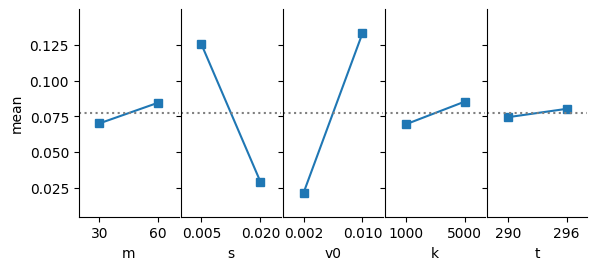

In [51]:
mistat.mainEffectsPlot(result[['m', 's', 'v0', 'k', 't', 'seconds']], 'seconds')
plt.show()

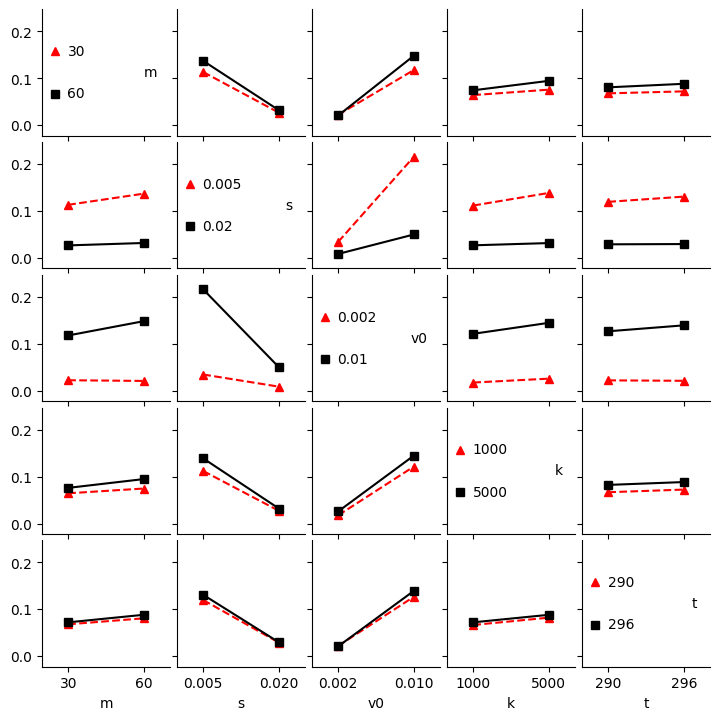

In [52]:
mistat.interactionPlot(result[['m', 's', 'v0', 'k', 't', 'seconds']], 'seconds')
plt.show()

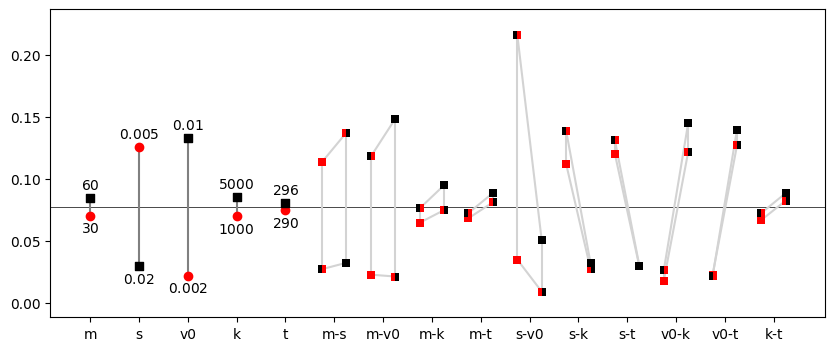

In [53]:
_, ax = plt.subplots(figsize=[10, 4])
mistat.marginalInteractionPlot(result[['m', 's', 'v0', 'k', 't', 'seconds']], 'seconds', ax=ax)
plt.show()

### $3^m$ Factorial Designs

In [54]:
def getStandardOrder(levels, labels):
    parameter = ''
    omega = 0
    for i, (level, label) in enumerate(zip(levels, labels), 1):
        omega += level * 3**(i-1)
        if level == 1:
            parameter = f'{parameter}{label}'
        elif level == 2:
            parameter = f'{parameter}{label}2'
    if parameter == '':
        parameter = 'Mean'
    return {'omega': omega, 'Parameter': parameter}

In [55]:
stress = mistat.load_data('STRESS')
standardOrder = pd.DataFrame(getStandardOrder(row[['A','B','C']], 'ABC')
                             for _, row in stress.iterrows())

# add information to dataframe stress and sort in standard order
stress.index = standardOrder['omega']
stress['Parameter'] = standardOrder['Parameter']
stress = stress.sort_index()

In [56]:
def get_psi3m(m):
    psi31 = np.array([[1, -1, 1], [1, 0, -2], [1, 1, 1]] )
    if m == 1:
        return psi31
    psi3m1 = get_psi3m(m-1)
    return np.kron(psi31, psi3m1)

In [57]:
Y_3m = stress['stress']

psi3m = get_psi3m(3)
delta3m = np.matmul(psi3m.transpose(), psi3m)
inv_delta3m = np.diag(1/np.diag(delta3m))
gamma_3m = np.matmul(inv_delta3m, np.matmul(psi3m.transpose(), Y_3m))

estimate = pd.DataFrame({
    'Parameter': stress['Parameter'],
    'LSE': gamma_3m,
})

In [58]:
# determine Lambda0 set as interactions that include quadratic terms
lambda0 = [term for term in stress['Parameter'] if '2' in term and len(term) > 2]
print(f'lambda0 : {lambda0}')
estimate['Significance'] = ['n.s.' if p in lambda0 else ''
                            for p in estimate['Parameter']]

# estimate sigma2 using non-significant terms in lambda0
sigma2 = 0
for idx, row in estimate.iterrows():
    p = row['Parameter']
    if p not in lambda0:
        continue
    idx = int(idx)
    sigma2 += row['LSE']**2 * np.sum(psi3m[:, idx]**2)
K0 = len(lambda0)
sigma2 = sigma2 / K0
print(f'K0 = {K0}')
print(f'sigma2 = {sigma2.round(2)}')

lambda0 : ['A2B', 'AB2', 'A2B2', 'A2C', 'A2BC', 'B2C', 'AB2C', 'A2B2C', 'AC2', 'A2C2', 'BC2', 'ABC2', 'A2BC2', 'B2C2', 'AB2C2', 'A2B2C2']
K0 = 16
sigma2 = 95.95


In [59]:
n = len(psi3m)
variance = sigma2 / (n * np.sum(psi3m**2, axis=0))
estimate['S.E.'] = np.sqrt(n * variance)

In [60]:
estimate.round(3)

,Parameter,LSE,Significance,S.E.
omega,,,,
0.0,Mean,223.781,,1.885
1.0,A,44.917,,2.309
2.0,A2,-1.843,,1.333
3.0,B,-42.494,,2.309
4.0,AB,-16.558,,2.828
5.0,A2B,-1.897,n.s.,1.633
6.0,B2,6.557,,1.333
7.0,AB2,1.942,n.s.,1.633
8.0,A2B2,-0.171,n.s.,0.943


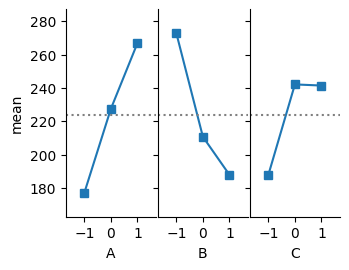

In [61]:
stress = mistat.load_data('STRESS')

# convert factor levels from (0,1,2) to (-1,0,1)
stress['A'] = stress['A'] - 1
stress['B'] = stress['B'] - 1
stress['C'] = stress['C'] - 1

mistat.mainEffectsPlot(stress, 'stress')
plt.show()

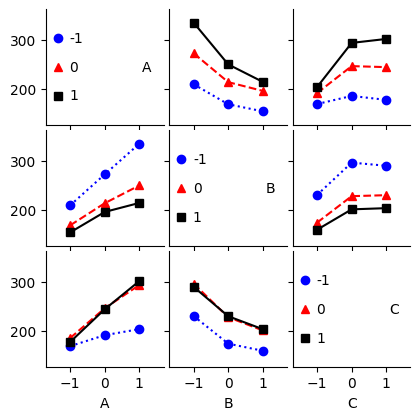

In [62]:
mistat.interactionPlot(stress, 'stress')
plt.show()

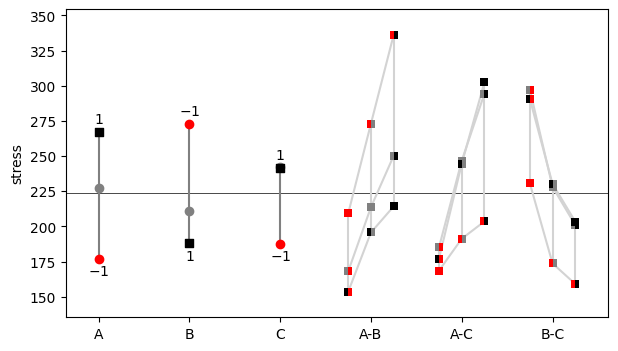

In [63]:
_, ax = plt.subplots(figsize=[7, 4])
mistat.marginalInteractionPlot(stress[['A', 'B', 'C', 'stress']], 'stress', ax=ax)
ax.set_ylabel('stress')
plt.show()

In [64]:
stress = mistat.load_data('STRESS')

# convert factor levels from (0,1,2) to (-1,0,1)
stress['A'] = stress['A'] - 1
stress['B'] = stress['B'] - 1
stress['C'] = stress['C'] - 1

# train a model including interactions and quadratic terms
formula = ('stress ~ A + B + C + A:B + A:C + B:C + A:B:C + ' +
           'I(A**2) + I(B**2) + I(C**2)')
model = smf.ols(formula, data=stress).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.975   
Dependent Variable: stress           AIC:                207.7190
Date:               2024-06-06 20:38 BIC:                221.9732
No. Observations:   27               Log-Likelihood:     -92.860 
Df Model:           10               F-statistic:        102.6   
Df Residuals:       16               Prob (F-statistic): 1.45e-12
R-squared:          0.985            Scale:              95.953  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     232.6815   4.9876  46.6516 0.0000 222.1081 243.2548
A              44.9167   2.3088  19.4543 0.0000  40.0222  49.8112
B             -42.4944   2.3088 -18.4052 0.0000 -47.3889 -37.5999
C              26.8167   2.3088  11.6148 0.0000  21.9222  31.7112
A:B           -16.5583   2.8277  -5.8557 0.0000 -22.5528 -10.5638
A:C            22.6167   2.8277   7.9982 0.0000  16.6222  28.6112
B:C            -3.9083   2.8277  -1.3821 0.1859  -9.9028   2.0862
A:B:C           2.0125   3.4632   0.5811 0.5693  -5.3293   9.3543
I(A ** 2)      -5.5278   3.9990  -1.3823 0.1859 -14.0053   2.9497
I(B ** 2)      19.6722   3.9990   4.9193 0.0002  11.1947  28.1497
I(C ** 2)     -27.4944   3.9990  -6.8753 0.0000 -35.9720 -19.0169
-----------------------------------------------------------------
Omnibus:               4.594        Durbin-Watson:          2.577
Prob(Omnibus):         0.101        Jarque-Bera (JB):       3.446
Skew:                  -0.329       Prob(JB):               0.179
Kurtosis:              4.622        Condition No.:          5    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

## Blocking and Fractional Replications of $2^m$ Factorial Designs

In [65]:
def renderDesign(design, mainEffects, to_latex=False):
    design = mistat.addTreatments(design, mainEffects)
    defining = set(design.columns) - set(mainEffects) - {'Treatments'}
    columns = [('Treatments', '')]
    columns.extend(('Main Effects', effect) for effect in mainEffects)
    columns.extend(('Defining Parameter', effect) for effect in design.columns if effect in defining)
    design.columns = pd.MultiIndex.from_tuples(columns, names=["first", "second"])
    if not to_latex:
        return design
    style = design.style.hide(axis='index')
    style = style.format(precision=0)
    return style.to_latex(hrules=True, column_format='c'+'r'*(len(columns)-1))

In [66]:
from pyDOE3 import fracfact
design = pd.DataFrame(fracfact('A B C ABC'), columns='A B C ABC'.split())

In [67]:
renderDesign(design, 'A B C'.split())

first  Treatments Main Effects           Defining Parameter
second                       A    B    C                ABC
0             (1)         -1.0 -1.0 -1.0               -1.0
1               A          1.0 -1.0 -1.0                1.0
2               B         -1.0  1.0 -1.0                1.0
3              AB          1.0  1.0 -1.0               -1.0
4               C         -1.0 -1.0  1.0                1.0
5              AC          1.0 -1.0  1.0               -1.0
6              BC         -1.0  1.0  1.0               -1.0
7             ABC          1.0  1.0  1.0                1.0

In [68]:
from pyDOE3 import fracfact
# define the generator
generator = 'A B C ABC'
design = pd.DataFrame(fracfact(generator), columns=generator.split())
block_n = design[design['ABC'] == -1]
block_p = design[design['ABC'] == 1]

In [69]:
renderDesign(block_n, ['A', 'B', 'C'])

first  Treatments Main Effects           Defining Parameter
second                       A    B    C                ABC
0             (1)         -1.0 -1.0 -1.0               -1.0
3              AB          1.0  1.0 -1.0               -1.0
5              AC          1.0 -1.0  1.0               -1.0
6              BC         -1.0  1.0  1.0               -1.0

In [70]:
renderDesign(block_p, ['A', 'B', 'C'])

first  Treatments Main Effects           Defining Parameter
second                       A    B    C                ABC
1               A          1.0 -1.0 -1.0                1.0
2               B         -1.0  1.0 -1.0                1.0
4               C         -1.0 -1.0  1.0                1.0
7             ABC          1.0  1.0  1.0                1.0

In [71]:
mistat.subgroupOfDefining(['ABCH', 'ABEFG', 'BDEFH'])

['', 'ABCH', 'ABEFG', 'ACDEF', 'ADGH', 'BCDG', 'BDEFH', 'CEFGH']

In [72]:
mainEffects = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
defining = ['ABCH', 'ABEFG', 'BDEFH', 'BCEFH']
design = pd.DataFrame(fracfact(' '.join(mainEffects)), columns=mainEffects)
design = mistat.addTreatments(design, mainEffects)
subgroup = mistat.subgroupOfDefining(defining, noTreatment='(1)')
block1 = design[design['Treatments'].isin(subgroup)]
block1

,Treatments,A,B,C,D,E,F,G,H
0,(1),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,CD,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
49,AEF,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
61,ACDEF,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
66,BG,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
78,BCDG,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
115,ABEFG,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
127,ABCDEFG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
135,ABCH,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
139,ABDH,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0


## Exploration of Response Surfaces

#### $3^k$-Designs

#### Central Composite Designs

In [73]:
factors = {
  's': [0.01, 0.015],
  'v0': [0.00625, 0.00875],
  'k': [2000, 4000],
  't0': [345, 355],
}
Design = doe.central_composite(factors, alpha='r', center=[4, 4])

In [74]:
simulator = mistat.PistonSimulator(**Design, m=60, p0=110_000, t=296, n_replicate=50, seed=2)
result = simulator.simulate()

# calculate mean and std of response by group
result = result.groupby(by='group')
result = result.agg({'s': 'mean', 'v0': 'mean', 'k': 'mean',
                     't0': 'mean', 'seconds':['mean','std']})

result.columns = ['s', 'v0', 'k', 't0', 'Ymean', 'Ystd']

In [76]:
# transformation between factors and code levels
factor2x = {factor: f'x{i}' for i, factor in enumerate(factors, 1)}
x2factor = {f'x{i}': factor for i, factor in enumerate(factors, 1)}
center = {factor: 0.5 * (max(values) + min(values))
          for factor, values in factors.items()}
unit = {factor: 0.5 * (max(values) - min(values))
        for factor, values in factors.items()}

# define helper function to convert code co-ordinates to factor co-ordinates
def toFactor(code, codeValue):
    ''' convert code to factor co-ordinates '''
    factor = x2factor[code]
    return center[factor] + codeValue * unit[factor]

# add code levels to table
for c in factors:
    result[factor2x[c]] =  (result[c] - center[c]) / unit[c]

In [77]:
table = result[['x1', 'x2', 'x3', 'x4', 'Ymean', 'Ystd']]
table.round(6)

,x1,x2,x3,x4,Ymean,Ystd
group,,,,,,
1,-1.0,-1.0,-1.0,-1.0,0.056346,0.007821
2,1.0,-1.0,-1.0,-1.0,0.037006,0.004519
3,-1.0,1.0,-1.0,-1.0,0.082830,0.010794
4,1.0,1.0,-1.0,-1.0,0.054473,0.005244
5,-1.0,-1.0,1.0,-1.0,0.066108,0.009887
6,1.0,-1.0,1.0,-1.0,0.040844,0.004320
7,-1.0,1.0,1.0,-1.0,0.102698,0.016162
8,1.0,1.0,1.0,-1.0,0.062328,0.006005
9,-1.0,-1.0,-1.0,1.0,0.052285,0.005888


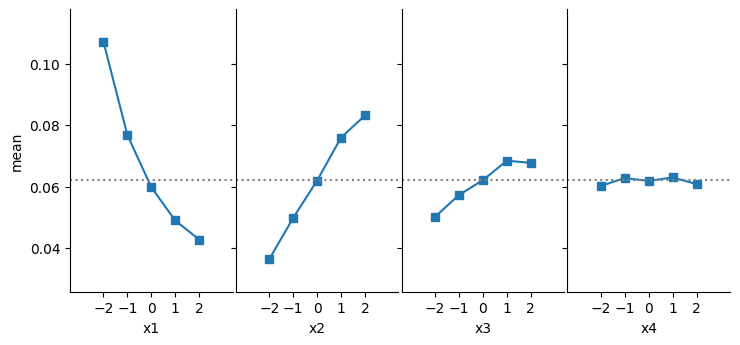

In [78]:
mistat.mainEffectsPlot(result, 'Ymean', factors=['x1', 'x2', 'x3', 'x4'], height=3.75, aspect=0.5)

In [79]:
formula = ('Ymean ~ (x1+x2+x3+x4)**2 + ' + 'I(x1**2) + I(x2**2) + I(x3**2) + I(x4**2)')
model = smf.ols(formula, data=result).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: Ymean            AIC:                -301.2069 
Date:               2024-06-06 20:48 BIC:                -279.2208 
No. Observations:   32               Log-Likelihood:     165.60    
Df Model:           14               F-statistic:        208.0     
Df Residuals:       17               Prob (F-statistic): 3.71e-16  
R-squared:          0.994            Scale:              3.5252e-06
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0599    0.0007   90.2640  0.0000   0.0585   0.0613
x1             -0.0146    0.0004  -38.1172  0.0000  -0.0154  -0.0138
x2              0.0126    0.0004   32.8412  0.0000   0.0118   0.0134
x3              0.0052    0.0004   13.4893  0.0000   0.0044 

In [80]:
formula = ('Ymean ~ x1 + x2 + x3 + x1:x3 + x1:x2 + I(x1**2)')
reduced_model = smf.ols(formula, data=result).fit()
print(reduced_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: Ymean            AIC:                -302.4490 
Date:               2024-06-06 20:49 BIC:                -292.1888 
No. Observations:   32               Log-Likelihood:     158.22    
Df Model:           6                F-statistic:        448.4     
Df Residuals:       25               Prob (F-statistic): 3.42e-24  
R-squared:          0.991            Scale:              3.8018e-06
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0596    0.0004  136.6637  0.0000   0.0587   0.0605
x1             -0.0146    0.0004  -36.7047  0.0000  -0.0154  -0.0138
x2              0.0126    0.0004   31.6243  0.0000   0.0118   0.0134
x3              0.0052    0.0004   12.9895  0.0000   0.0044 

In [81]:
def plotResponseSurface(model, center, unit, x1=None, x2=None,
                        x3=0, x4=0, ncontours=20):
    # predict in code co-ordinates
    x1 = x1 or (-2, 4)
    x2 = x2 or (-2, 2)
    x1 = np.linspace(*x1)
    x2 = np.linspace(*x2)
    X1, X2 = np.meshgrid(x1, x2)
    exog = pd.DataFrame({'x1': X1.ravel(), 'x2': X2.ravel(), 'x3': x3, 'x4': x4})
    responses = model.predict(exog=exog)

    # display in factor co-ordinates
    svalues = toFactor('x1', x1)
    v0values = toFactor('x2', x2)
    CS = plt.contour(svalues, v0values,
                responses.values.reshape(len(x2), len(x1)),
                ncontours, colors='gray')
    ax = plt.gca()
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('s')
    ax.set_ylabel('v0')
    return ax

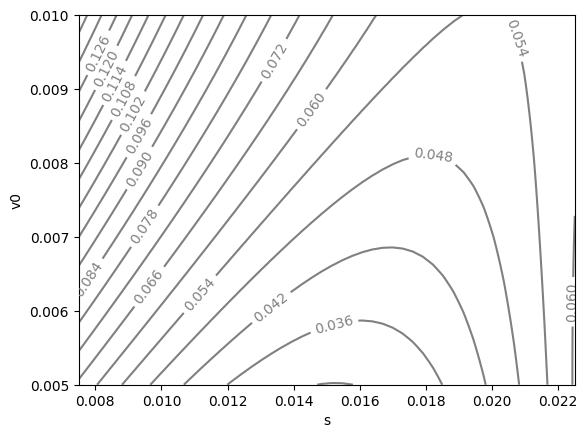

In [82]:
plotResponseSurface(model, center, unit)
plt.show()

### Approaching the Region of the Optimal Yield

In [83]:
# calculate gradient and create steps along gradient to descend
codes = ['x1', 'x2', 'x3', 'x4']
rsm = mistat.ResponseSurfaceMethod(model, codes)
distance = np.arange(0, 2.6, 0.5)
direction = {code: np.zeros(len(distance)) for code in codes}
x = pd.Series(np.zeros(4), index=codes)
for step in range(len(distance)):
    for code in codes:
        direction[code][step] = x[code]
    gradient = rsm.gradient(x)
    x = x - 0.5 * gradient

In [84]:
path = rsm.constrainedOptimization((0, 0, 0, 0), distances=(0.5, 1, 1.5, 2, 2.5), maximize=False)

steps = pd.DataFrame({x2factor[code]: toFactor(code, path[code])
                      for code in rsm.codes})

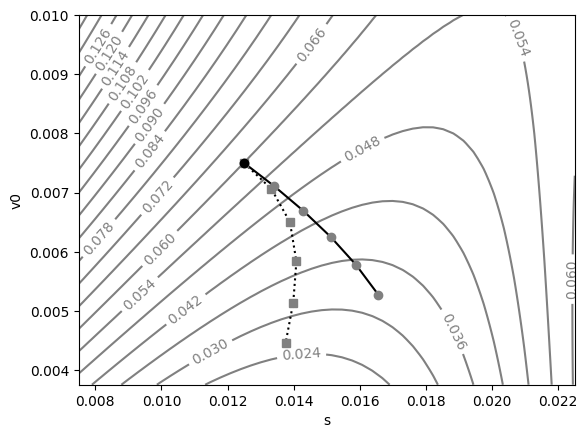

In [86]:
# convert direction from code co-ordinates to factor co-ordinates
factor_direction = {x2factor[code]: toFactor(code, d)
                    for code, d in direction.items()}

# predict along the steps in direction and collect results
result = pd.DataFrame({
    'Distance': distance,
    **direction,
    **factor_direction,
    'yhat': model.get_prediction(exog=direction).predicted_mean,
})

ax = plotResponseSurface(model, center, unit, x1=(-2, 4), x2=(-3, 2))
ax.plot(result['s'], result['v0'], '-o', color='black', markerfacecolor='gray', markeredgecolor='gray')

ax.plot(steps['s'], steps['v0'], ':s', color='black', markerfacecolor='gray', markeredgecolor='gray')

ax.plot(center['s'], center['v0'], 'o', color='black')

plt.show()

In [87]:
table = result[['Distance', 'x1', 'x2', 'x3', 'x4', 's', 'v0', 'k', 't0', 'yhat']]

In [88]:
table.round(3)

,Distance,x1,x2,x3,x4,s,v0,k,t0,yhat
0,0.0,0.000,0.000,0.000,0.000,0.012,0.008,3000.000,350.000,0.060
1,0.5,0.366,-0.315,-0.129,-0.003,0.013,0.007,2870.523,349.985,0.051
2,1.0,0.717,-0.648,-0.257,-0.006,0.014,0.007,2742.561,349.972,0.044
3,1.5,1.048,-1.001,-0.383,-0.008,0.015,0.006,2616.998,349.961,0.039
4,2.0,1.353,-1.378,-0.505,-0.009,0.016,0.006,2495.215,349.953,0.035
5,2.5,1.623,-1.782,-0.621,-0.010,0.017,0.005,2379.333,349.952,0.033


### Canonical Representation

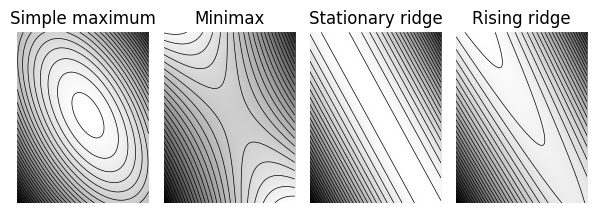

In [89]:
import matplotlib.cm as cm

def surface1(x, y):
  return 83.57 + 9.39*x + 7.12*y - 7.44*x**2 - 3.71*y**2 - 5.80*x*y

def surface2(x, y):
  return 84.29 + 11.06*x + 4.05*y - 6.46*x**2 - 0.43*y**2 - 9.38*x*y

def surface3(x, y):
  return 83.93 + 10.23*x + 5.59*y - 6.95*x**2 - 2.07*y**2 - 7.59*x*y

def surface4(x, y):
  return 82.71 + 8.80*x + 8.19*y - 6.95*x**2 - 2.07*y**2 - 7.59*x*y

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-6.0, 7.0, delta)
X, Y = np.meshgrid(x, y)
Z = surface2(X, Y)

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, axes = plt.subplots(figsize=(6, 6), ncols=4) #, nrows=2)
# axes = [*axes[0], *axes[1]]

for ax, surface in zip(axes, [surface1, surface2, surface3, surface4]):
    Z = surface(X, Y)
    im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(min(x), max(x), min(y), max(y)))
    CS = ax.contour(X, Y, Z, 30, colors='black', linewidths=0.5)
    ax.axis('off')
axes[0].set_title('Simple maximum')
axes[1].set_title('Minimax')
axes[2].set_title('Stationary ridge')
axes[3].set_title('Rising ridge')
plt.tight_layout()
plt.show()

In [90]:
codes = ['x1', 'x2', 'x3', 'x4']
rsm = mistat.ResponseSurfaceMethod(model, codes)
stationary = rsm.stationary_point()

factor_stationary = pd.Series({x2factor[code]: toFactor(code, d)
                     for code, d in stationary.items()})
factor_stationary

s        0.018796
v0       0.009571
k     1451.172868
t0     317.713341
dtype: float64

In [91]:
path = rsm.constrainedOptimization(rsm.stationary_point(), maximize=False,
                                   reverse=True)
steps = pd.DataFrame({x2factor[code]: toFactor(code, path[code])
                      for code in rsm.codes})
steps.head()

,s,v0,k,t0
0,0.018796,0.009571,1451.172868,317.713341
1,0.018337,0.008990,1441.344186,317.749174
2,0.018461,0.008589,2055.556297,317.775331
3,0.018293,0.008099,2357.674709,317.806241
4,0.018126,0.007608,2659.852584,317.837251


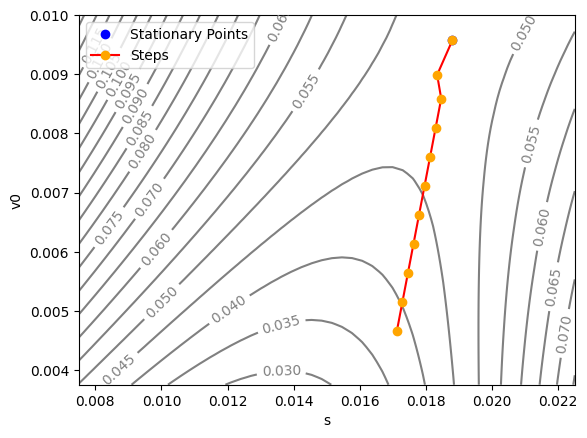

In [105]:
# Assuming `plotResponseSurface` is a custom function or part of a package you're using

# Generate the response surface plot
ax = plotResponseSurface(model, center, unit, x1=(-2, 4), x2=(-3, 2), x3=stationary['x3'], x4=stationary['x4'])

# Plot stationary points in a specific color (e.g., blue)
ax.plot(factor_stationary['s'], factor_stationary['v0'], 'o',
        color='blue', label='Stationary Points')

# Plot steps in another color (e.g., red) with customized markers
ax.plot(steps['s'], steps['v0'], '-o', color='red', markerfacecolor='orange', markeredgecolor='orange', label='Steps')

# Add legend to distinguish the different plots
plt.legend()

# Show the plot
plt.show()


## Evaluating Designed Experiments

In [94]:
design35 = mistat.load_data('CUSTOMDESIGN_35')
design80 = mistat.load_data('CUSTOMDESIGN_80')
design169 = mistat.load_data('CUSTOMDESIGN_169')

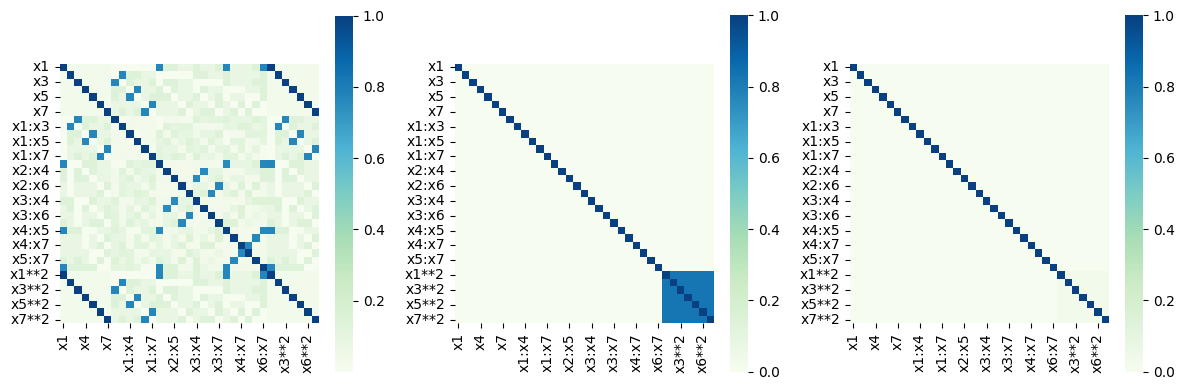

In [99]:
def plotCorrelation(design, mod=0, ax=None):
    mm = mistat.getModelMatrix(design, mod=mod)
    mm = mm.drop(columns='Intercept')
    corr = mm.corr().abs()
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(11, 7)
    sns.heatmap(corr, cmap='GnBu', ax=ax, square=True)
    return ax

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
plotCorrelation(design35, mod=2, ax=axes[0])
plotCorrelation(design80, mod=2, ax=axes[1])
plotCorrelation(design169, mod=2, ax=axes[2])
plt.tight_layout()
plt.show()

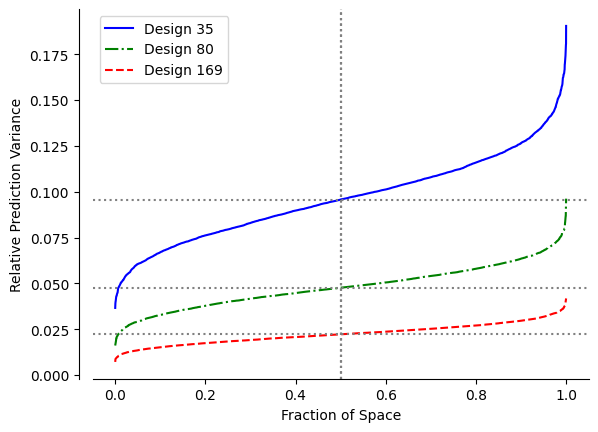

In [104]:
ax = None
ax = mistat.FDS_Plot(design35, ax=ax, label='Design 35', plotkw={'linestyle': '-',  'color': 'blue'})
ax = mistat.FDS_Plot(design80, ax=ax, label='Design 80', plotkw={'linestyle': '-.', 'color': 'green'})
ax = mistat.FDS_Plot(design169, maxscale=np.power(2, 7/4),
                     ax=ax, label='Design 169', plotkw={'linestyle': '--', 'color': 'red'})
# Shift the left spine (y-axis) outwards by a fixed amount
left_spine = ax.spines['left']
left_spine.set_position(('outward', 10))  # Move left spine outwards
left_spine.set_visible(True)  # Make the left spine visible

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()